# **Assignment #6**
### **Text Mining and Classification on the 'Yelp Reviews'**
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : SeongWoo Cho

<br>

#### **INDEX** 

1. **EDA**
   - 1.1. **Create five histograms** of text length of reviews with dif-numbers of stars(1-5 stars).
  
   - 1.2. **Create boxplots** of text length for each number-of-star category
  
   - 1.3. **Create countplots** of the number of occurences for each number-of-star category
  
   - 1.4. **Groupby** to get the mean values of the four numerical cols (i.e., cool,useful,funny,text lenth) within each number-of-star category
  
   - 1.5. **Produce a correlation matrix** of the four numerical columns

<br>

2. **NLP classification** tasks

    - 2.1 **Preprocessing**
  
        - 2.1.1 Exclude 2,3,4-Star : yelp_class
            
        - 2.1.2 Create two objects: X(Text col) and y(Star col).

        - 2.1.3 Vectorization1 : create a CountVectorizer object.

        - 2.1.4 Vectorization2 : Use the “fit_transform” method on the CountVectorizer object

    - 2.2 **Building a Model**

        - 2.2.1. **Split** up the data

        - 2.2.2. **Create an instance of the estimator.**

        - 2.2.3. **Train the model**
    - 2.3 **Predicting and Evaluating**

        - 2.3.1. **Predict** whether the number of stars on a review is 5 or 1 from X_test.

        - 2.3.2.  **Create a confusion matrix and classification report**

        - 2.3.3.   **The most important five words** in the prediction.

<br>

3. **The way using Pipeline Methodology**

<br><br>

    ref: https://sud3010ganesh.github.io/2018-05-26-yelpreviewtextanalytics/
---

<br><br>

### **Yelp Reviews Dataset**

This dataset is a of Yelp's text reviews data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the most recent dataset you'll find information about businesses across 8 metropolitan areas in the USA and Canada.

- Each observation in the data set is a particular user’s review on a particular business. The “stars” column (i.e., variable) shows the number of “stars” (1 through 5) assigned by the reviewer to the business. More stars are better. In other words, it is the rating of the business by the person who wrote the review.

- The “cool” column is the number of “cool” votes this review received from other Yelp users. All reviews start with 0 “cool” votes. There is no limit to how many “cool” votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business. In a similar way, the “useful” and “funny” columns are also vote ratings of the reviews in the different aspects.

<br>

#### **columns**
    - review_id : hash key
    - business_id : hash key
    - date
    - text
    - user_id : hash key
    - type : all of these have 'review' value
    - cool : int score about the review scored by the other reviewers
    - useful : int score about the review scored by the other reviewers
    - funny : int score about the review scored by the other reviewers




<br><br>
*source : https://www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset*

---

<br><br>

# **0. Preparing**

In [44]:
import numpy as np
import pandas as pd

In [45]:
yelp = pd.read_csv('yelp.csv')

<br>

In [46]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [47]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [48]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


<br>

**Create a new column called "text length" which is the number of words in the text column.**

In [49]:
yelp['text length'] = yelp['text'].apply(len)

<br>

# **1. EDA**

### 1.0 preparing

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

<br>

### 1.1 Create five histograms by star
Create five histograms of text length of reviews with dif-numbers of stars(1-5 stars).

<Figure size 720x360 with 0 Axes>

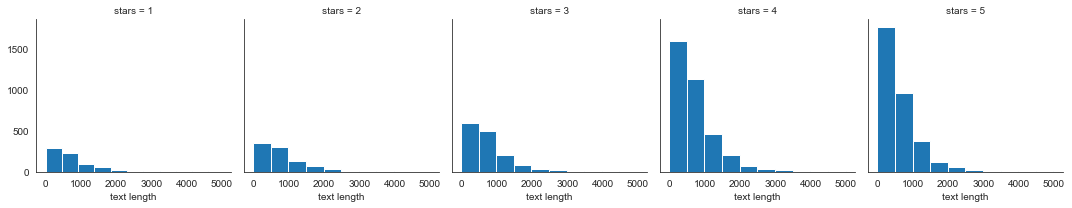

<Figure size 720x360 with 0 Axes>

In [51]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

plt.figure(figsize= (10, 5))

<br>

### 1.2 Create boxplots
Create boxplot of text length for each number-of-star category.

<AxesSubplot:xlabel='stars', ylabel='text length'>

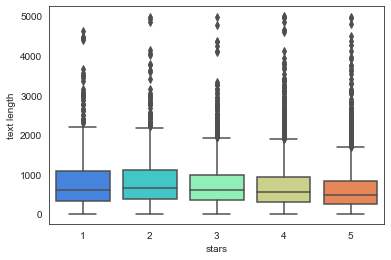

In [52]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

<br>

### 1.3 Create countplots
Create a countplot of the number of occurences for each number-of-star category.

<AxesSubplot:xlabel='stars', ylabel='count'>

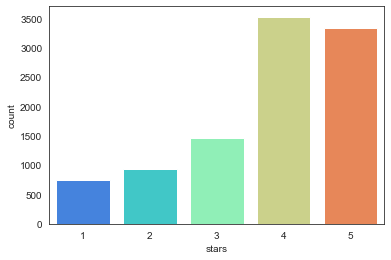

In [53]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

<br>

### 1.4 Groupby to get the mean values
Groupby to get the mean values of the four numerical cols(cool,useful,funny,text length) within each number-of-star category.

In [54]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<br>

### 1.5 Produce a correlation matrix 
Produce a correlation matrix of the four numerical columns

In [55]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


# **2. NLP Classification Tasks**

<br>

## **2.1. Preprocessing**

### 2.1.1 Exclude 2,3,4-Star
 Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [56]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

### 2.1.2 Create two objects: X(Text col), y(Star col)
Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)

In [57]:
X = yelp_class['text']
y = yelp_class['stars']

### 2.1.3 Vectorization1 : Create a CountVectorizer object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

### 2.1.4 Vectorization2 : Use the 'fit_transform' on the Convectorizer
Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.

In [59]:
X = cv.fit_transform(X)

<br>

## **2.2. Building a Model**


### 2.2.1 Split up the data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

### 2.2.2 Create an instance of the estimator

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### 2.2.3 Train the model
Now fit nb using the training data.

In [63]:
nb.fit(X_train,y_train)

MultinomialNB()

<br>

### **2.3. Predicting adn Evaluating**

### 2.3.1 Predicting
predict whether the number of stars on a review is 5 or 1 from X_test.

In [64]:
predictions = nb.predict(X_test)

<br>

### 2.3.2 Create a confusion matrix and classification report

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



<AxesSubplot:>

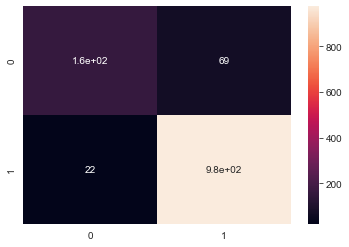

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

<br>

### 2.3.3 The most important five words in the prediction

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
import nltk 
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
from nltk.corpus import stopwords

# ref : https://www.kaggle.com/code/sachinsharma1123/sentiment-analysis
'''
step1.
In this section we have created two list for extracting the positive(5-class) and negative reviews(0-class)¶
'''

positive=[]
negative=[]

positive_reviews=yelp_class[yelp_class['stars']==5]['text']
negative_reviews=yelp_class[yelp_class['stars']==1]['text']

positive_reviews.head()

'''
step2.
The extract_postive function will do following things:
1-It will tokenize the text from positive reviews
2-Remove the stopwords
3-Convert into lowercase
'''
#1.positive work
def extract_positive(positive_reviews):
    global positive
    words = [word.lower() for word in word_tokenize(positive_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    positive=positive+words
    
#2.negative work
def extract_negative(negative_reviews):
    global negative
    words = [word.lower() for word in word_tokenize(negative_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    negative=negative+words
    
    # Applying the above two functions on positive and negative reviews
positive_reviews.apply(extract_positive)
negative_reviews.apply(extract_negative)

23      None
31      None
35      None
61      None
64      None
        ... 
9924    None
9931    None
9953    None
9984    None
9987    None
Name: text, Length: 749, dtype: object

In [114]:
from nltk import FreqDist

positive_fdist = FreqDist(positive)
negative_fdist = FreqDist(negative)

print('Positive top 10 Freq words: ',positive_fdist.most_common(10),'\n','Negative top 10 Freq words: ',negative_fdist.most_common(10))

Positive top 10 Freq words:  [('great', 1999), ('place', 1986), ('food', 1670), ('good', 1653), ('like', 1266), ('one', 1240), ('get', 1107), ('love', 1100), ('time', 1054), ('go', 1042)] 
 Negative top 10 Freq words:  [('food', 575), ('place', 487), ('like', 435), ('one', 397), ('would', 387), ('get', 360), ('service', 320), ('back', 320), ('go', 304), ('good', 301)]


### **2.3.3+ Word Cloud**


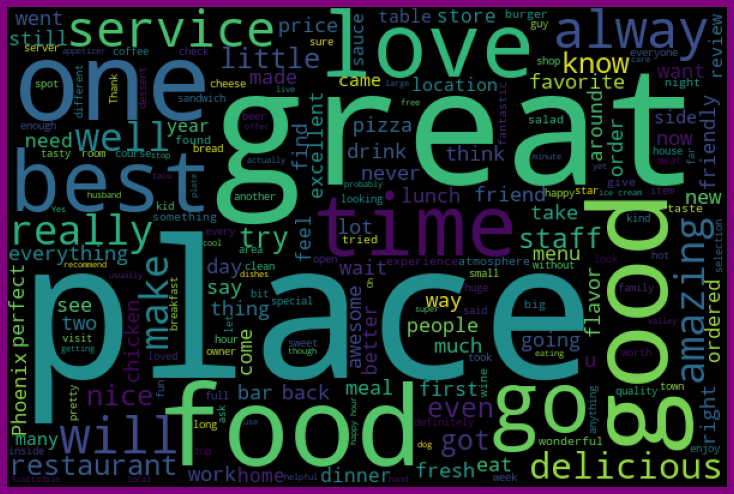

In [71]:
from wordcloud import WordCloud
pos_review_cloud=WordCloud(width=600,height=400).generate(" ".join(positive_reviews))
plt.figure(figsize=(10,8),facecolor='purple')
plt.imshow(pos_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

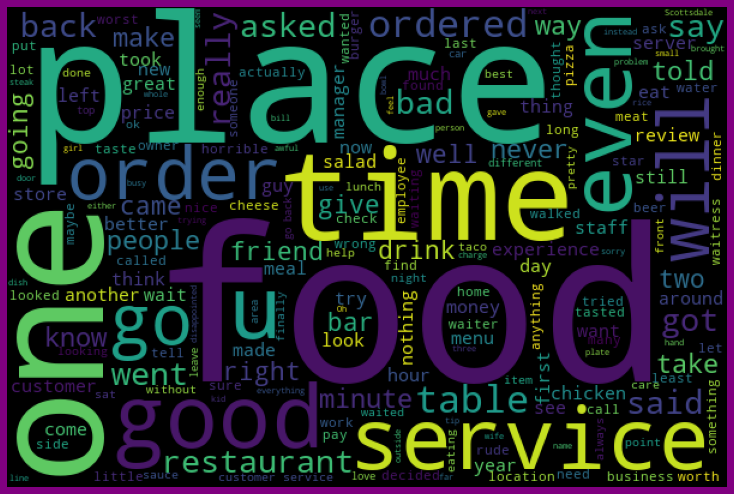

In [83]:
from wordcloud import WordCloud
pos_review_cloud=WordCloud(width=600,height=400).generate(" ".join(negative_reviews))
plt.figure(figsize=(10,8),facecolor='purple')
plt.imshow(pos_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<br>

---

<br>